Ładowanie i przetwarzanie obrazów odcisków palców

In [1]:
# import cv2
# import os

# def load_images_from_folder(folder):
#     images = []
#     for filename in os.listdir(folder):
#         img = cv2.imread(os.path.join(folder,filename))
#         if img is not None:
#             images.append(img)
#     return images

# def preprocess_image(image):
#     normalized_image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
#     return normalized_image



Liczba wczytanych zdjęć: 320
Ścieżka do losowego obrazu: fingerprints/DB1_B\106_1.tif


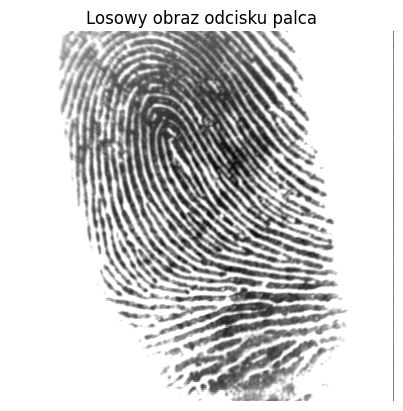

In [2]:
import cv2
import os
import numpy as np
import random
import matplotlib.pyplot as plt

def load_tiff_images_from_folder(base_folder):
    images = []
    for root, dirs, files in os.walk(base_folder):
        for file in files:
            if file.endswith(".tif"):
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    images.append((img_path, img))
    return images

folder_path = 'fingerprints/'  
images = load_tiff_images_from_folder(folder_path)

# Informacje o liczbie wczytanych zdjęć
print(f"Liczba wczytanych zdjęć: {len(images)}")

# Wyświetlenie losowego obrazu z wczytanych
if images:
    random_image_path, random_image = random.choice(images)
    print(f"Ścieżka do losowego obrazu: {random_image_path}")
    plt.imshow(random_image, cmap='gray')
    plt.title("Losowy obraz odcisku palca")
    plt.axis('off')  # Wyłączenie osi
    plt.show()
else:
    print("Nie wczytano żadnych obrazów.")


Ekstrakcja minucji

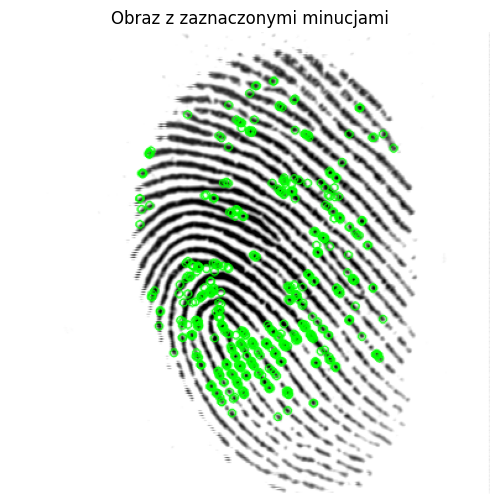

Liczba wykrytych kluczowych punktów (minucji): 500


In [3]:
# def extract_minutiae(image):
#     orb = cv2.ORB_create()
#     keypoints = orb.detect(image, None)
#     keypoints, descriptors = orb.compute(image, keypoints)
#     return keypoints

def preprocess_image(image):
    # Normalizacja obrazu do zakresu 0-255 i konwersja do uint8
    processed_image = cv2.normalize(image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    return processed_image

def extract_minutiae(image):
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(image, None)
    return keypoints, descriptors

def show_image_with_keypoints(image, keypoints):
    img_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=0)
    plt.figure(figsize=(8, 6))
    plt.imshow(img_with_keypoints, cmap='gray')
    plt.title("Obraz z zaznaczonymi minucjami")
    plt.axis('off')
    plt.show()



# Załóżmy, że 'random_image' to wczytany losowy obraz odcisku palca
random_image = images[0][1]  # Przykład, dostosuj indeks do faktycznego obrazu

# Przetwarzanie wstępne
processed_image = preprocess_image(random_image)

# Ekstrakcja minucji
keypoints, descriptors = extract_minutiae(processed_image)

# Wyświetlenie obrazu z minucjami
show_image_with_keypoints(processed_image, keypoints)

# Opcjonalnie, wypisz liczby kluczowych punktów
print(f"Liczba wykrytych kluczowych punktów (minucji): {len(keypoints)}")



Analiza geometrii palca

Zmierzone wymiary: {'x': 0, 'y': 0, 'width': 388, 'height': 374}


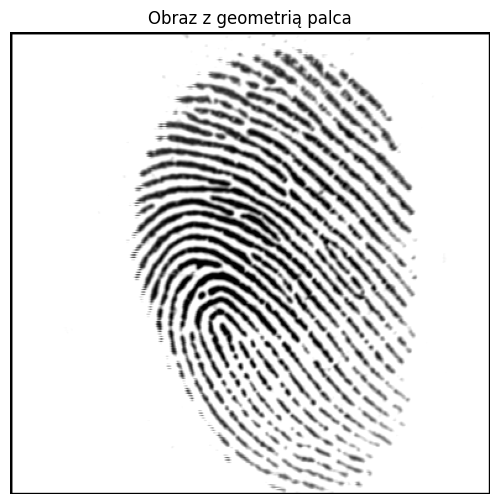

In [4]:
def measure_finger_geometry(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        cnt = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(cnt)
        return {"x": x, "y": y, "width": w, "height": h}  # Dodajemy 'x' i 'y' do zwracanego słownika
    return None


def show_image_with_geometry(image, geometry):
    if geometry:
        x, y, w, h = geometry["x"], geometry["y"], geometry["width"], geometry["height"]
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        text = f"Width: {w}, Height: {h}"
        cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    else:
        plt.text(0.5, 0.5, 'No contours found', horizontalalignment='center', verticalalignment='center')
    plt.figure(figsize=(8, 6))
    plt.imshow(image, cmap='gray')
    plt.title("Obraz z geometrią palca")
    plt.axis('off')
    plt.show()


# Przetwarzanie wstępne obrazu już wykonano w poprzednim kroku, użyjemy tego samego obrazu 'processed_image'

# Mierzenie geometrii
geometry = measure_finger_geometry(processed_image)
print(f"Zmierzone wymiary: {geometry if geometry else 'Brak konturów'}")

# Wyświetlanie obrazu z geometrią
if geometry:
    show_image_with_geometry(processed_image, geometry)
else:
    print("Nie znaleziono konturów do wyświetlenia.")


In [5]:
def validate_geometry_consistency(image, iterations=5):
    results = []
    for _ in range(iterations):
        processed_image = preprocess_image(image)
        geometry = measure_finger_geometry(processed_image)
        results.append(geometry)
        if all(r == results[0] for r in results):
            print("Geometry measurements are consistent.")
        else:
            print("Geometry measurements vary:", results)

# Wywołaj funkcję walidacji na losowym obrazie
validate_geometry_consistency(random_image)


Geometry measurements are consistent.
Geometry measurements are consistent.
Geometry measurements are consistent.
Geometry measurements are consistent.
Geometry measurements are consistent.
